In [1]:
import random

from keyname import keyname as kn
from matplotlib import pyplot as plt
from nbmetalog import nbmetalog as nbm
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from slugify import slugify
import statsmodels.api as sm
import statsmodels.formula.api as smf
from teeplot import teeplot as tp
import itertools as it
import matplotlib.patheffects as pe


In [2]:
np.random.seed(1)
random.seed(1)


In [3]:
from conduitpylib.viz import _get_defaults as cfg

from conduitpylib.viz import beleaguerment_facetplot, beleaguerment_regplot

from conduitpylib.wrangle import (
    retrieve_and_prepare_delta_dataframes,
    wrangle_instrumentation_longform,
)


<Figure size 72x72 with 0 Axes>

In [4]:
nbm.print_metadata()


context: ci
hostname: 3f051fb77070
interpreter: 3.8.10 (default, May 26 2023, 14:05:08)  [GCC 9.4.0]
nbcellexec: 4
nbname: a=beleaguerment+what=intranode-vs-internode+compute-work=0+simels_per_cpu=2048+ext=
nbpath: /opt/conduit/binder/date=2021+project=72k5n/a=computation-vs-communication/a=beleaguerment+what=intranode-vs-internode+compute-work=0+simels_per_cpu=2048+ext=.ipynb
revision: null
session: 88b5dcc0-5afb-4348-bef6-57bfc0d1d1fd
timestamp: 2023-11-14T03:01:28Z00:00


IPython==7.16.1
keyname==0.5.3
yaml==5.4.1
matplotlib==3.5.2
nbmetalog==0.2.6
numpy==1.23.5
pandas==1.1.2
scipy==1.5.4
seaborn==0.13.0
statsmodels==0.12.2
teeplot==0.6.1
re==2.2.1
ipython_genutils==0.2.0
logging==0.5.1.2
zmq==22.2.1
json==2.0.9
six==1.15.0
ipykernel==5.5.3


# Get Data


In [5]:
longitudinal_df, snapshot_df = retrieve_and_prepare_delta_dataframes(
    df_inlet_url="https://osf.io/k873q/download",
    df_outlet_url="https://osf.io/5bn96/download",
    treatment_column="Log Compute Work",
)


a: df_inlet
digest: 5c871bda80ef680f1472813f292f76d3bc5583e49496a3d69419a78b13068904
num cols: 43
num cols all na: 2
num cols any na: 43
num na: 3151
num rows: 1301
num rows all na: 1
num rows any na: 1301
size: 1M

a: df_outlet
digest: d6980b842020eec2d895c66334e44cab87a7e52bcf1e77a86929eb4a65d0d35c
num cols: 69
num cols all na: 6
num cols any na: 69
num na: 7943
num rows: 1301
num rows all na: 1
num rows any na: 1301
size: 1M

df_inlet has 1 na rows, dropping them
df_outlet has 1 na rows, dropping them


# Compare Finalized and Rolling Measures


teeplots/./hue=instrumentation+treatment=0+viz=beleaguerment-facetplot+x=messages-received-per-second+y=messages-sent-per-second+ext=.pdf
skipping teeplots/./hue=instrumentation+treatment=0+viz=beleaguerment-facetplot+x=messages-received-per-second+y=messages-sent-per-second+ext=.png


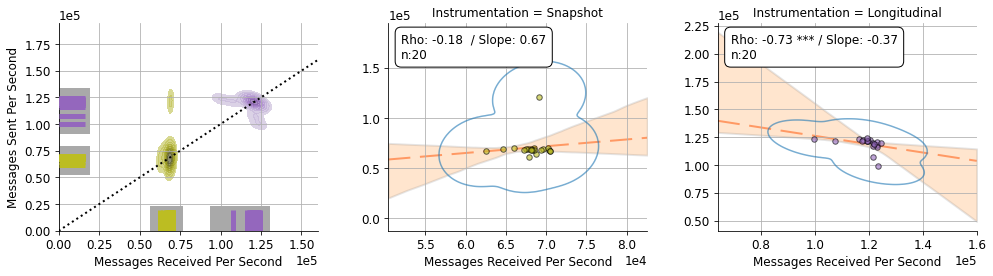

teeplots/./hue=instrumentation+treatment=1+viz=beleaguerment-facetplot+x=messages-received-per-second+y=messages-sent-per-second+ext=.pdf
skipping teeplots/./hue=instrumentation+treatment=1+viz=beleaguerment-facetplot+x=messages-received-per-second+y=messages-sent-per-second+ext=.png


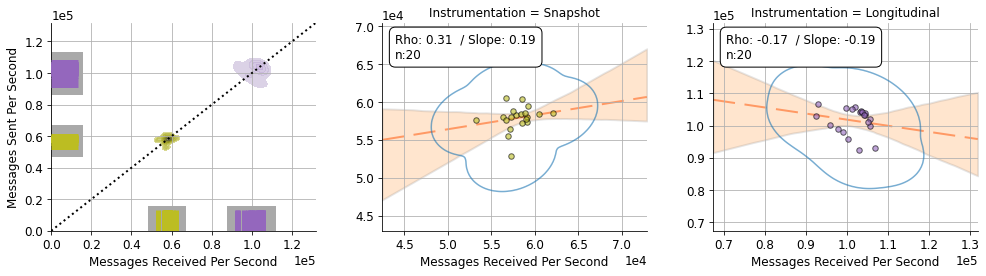

teeplots/./hue=instrumentation+treatment=2+viz=beleaguerment-facetplot+x=messages-received-per-second+y=messages-sent-per-second+ext=.pdf
skipping teeplots/./hue=instrumentation+treatment=2+viz=beleaguerment-facetplot+x=messages-received-per-second+y=messages-sent-per-second+ext=.png


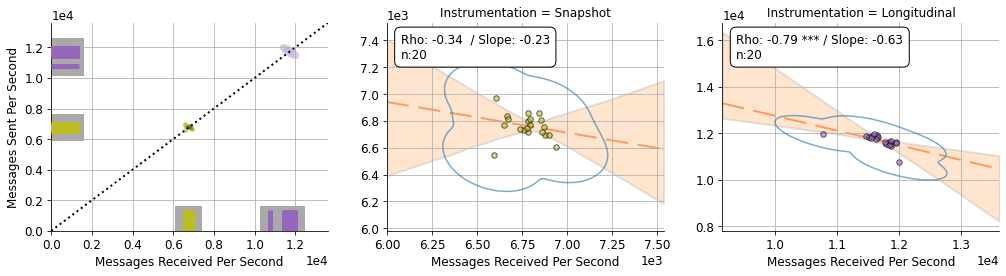

teeplots/./hue=instrumentation+treatment=3+viz=beleaguerment-facetplot+x=messages-received-per-second+y=messages-sent-per-second+ext=.pdf
skipping teeplots/./hue=instrumentation+treatment=3+viz=beleaguerment-facetplot+x=messages-received-per-second+y=messages-sent-per-second+ext=.png


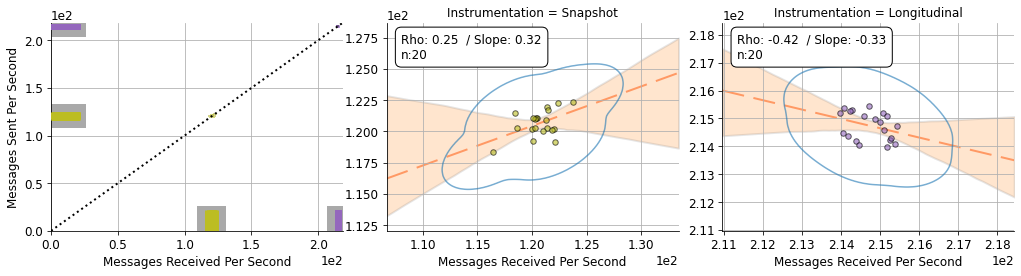

teeplots/./hue=instrumentation+treatment=4+viz=beleaguerment-facetplot+x=messages-received-per-second+y=messages-sent-per-second+ext=.pdf
skipping teeplots/./hue=instrumentation+treatment=4+viz=beleaguerment-facetplot+x=messages-received-per-second+y=messages-sent-per-second+ext=.png


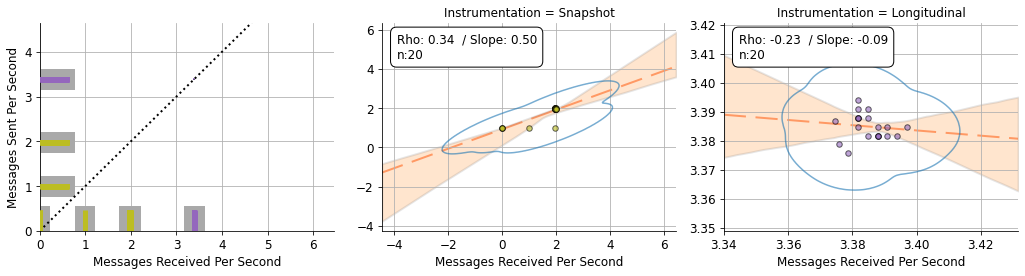

In [6]:
data = wrangle_instrumentation_longform(
    longitudinal_df=longitudinal_df,
    snapshot_df=snapshot_df,
)

for treatment, group in data.groupby("Log Compute Work"):
    group_df = group.reset_index()
    tp.tee(
        beleaguerment_facetplot,
        data=group_df,
        x="Messages Received Per Second",
        y="Messages Sent Per Second",
        hue="Instrumentation",
        annotation_kwargs=dict(
            xy=(0.05, 0.95),
        ),
        scatter_kwargs=dict(
            alpha=0.6,
            s=30,
            zorder=999,
        ),
        kde_kwargs=dict(
            cut=10,
            kde_thresh=1e-3,
        ),
        regline_kwargs=dict(
            linewidth=6,
            zorder=-9999,
        ),
        teeplot_outattrs={
            "treatment": slugify(str(treatment)),
        },
    )
    plt.show()
